In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Preface

## What is a NEET?

A NEET, [defined as](https://www.oecd.org/en/data/indicators/youth-not-in-employment-education-or-training-neet.html) an individual (typically young) that is *not in education, employment or training*. While empirical definitions for NEETs vary a bit--depending on age ranges to include (16 to 24? 20 to 29?), or how to define the activity criteria (unemployed? or not in labor force?)--the general NEET rates shouldn't vary too considerably. Rather, the directional trends should stay the same. 

Nonetheless, we'll try out multiple definitions throughout this project. As a reference, the OECD [publishes NEET rates](https://www.oecd.org/en/data/indicators/youth-not-in-employment-education-or-training-neet.html?oecdcontrol-dec63071aa-var6=15_29) at the country-level. Let's briefly take a look at the overall NEET rates by country in 2022, looking at 15-29 year-olds.

In [15]:
oecd_overall = pd.read_csv('../datasets/OECD_15to29_NEET.csv', skiprows=3, names = ['country', 'rate'])
oecd_overall.sort_values(by='rate', ascending=False).head()

,country,rate
0,Türkiye,27.931236
1,Italy,22.926674
2,Mexico,19.481358
3,Spain,16.476675
4,Greece,16.008015


In 2022, 28% of Turkey's 15-29 population were NEETs; 23% for Italy and 19% for Mexico. That's quite stark, but what's the average? and how about the US?

In [34]:
oecd_avg = oecd_overall[oecd_overall['country'].str.startswith('OECD')]
print(oecd_avg)

           country       rate
10  OECD - Average  12.645776


In [33]:
usa_avg = oecd_overall[oecd_overall['country'].str.startswith('United States')]
print(usa_avg)

         country       rate
5  United States  14.460077


The US is above the OECD average NEET rate by a bit. Let's plot these rates to see the distribution.

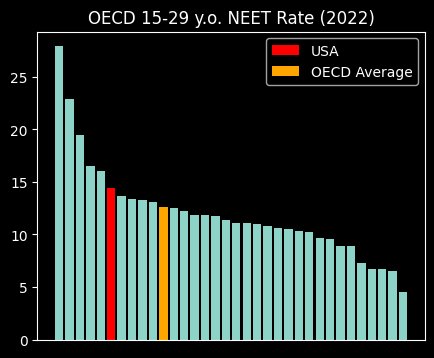

In [65]:
plt.figure(figsize=(5,4))
plt.bar(x=oecd_overall['country'], height=oecd_overall['rate'])
plt.bar(x=usa_avg['country'], height=usa_avg['rate'], color = 'red', label='USA')
plt.bar(x=oecd_avg['country'], height=oecd_avg['rate'], color = 'orange', label = 'OECD Average')
plt.title('OECD 15-29 y.o. NEET Rate (2022)')
plt.xticks([])
plt.legend();

Another question some have (and what we will primarily be concerned with) is how NEET rates vary by gender? Are young men more likely to be sitting at home doing nothing? Fortunately, OECD breaks their data down by gender as well.

In [48]:
oecd_men = pd.read_csv('../datasets/OECD_15to29_Men_NEET.csv', skiprows=3, names = ['country', 'rate'])
oecd_women = pd.read_csv('../datasets/OECD_15to29_Women_NEET.csv', skiprows=3, names = ['country', 'rate'])

oecd_gender = oecd_men.merge(oecd_women, on='country', suffixes=['men', 'women'])

oecd_avg_gender = oecd_gender[oecd_gender['country'].str.startswith('OECD')]
oecd_US_gender = oecd_gender[oecd_gender['country'].str.startswith('United States')]

print(oecd_avg_gender)
print(oecd_US_gender)

           country    ratemen  ratewomen
12  OECD - Average  11.061154  14.656483
         country    ratemen  ratewomen
6  United States  12.724692   16.20015


Here, it looks like the NEET rate was higher for women than it was for men in 2022, both overall and for the United States. How about for other countries?

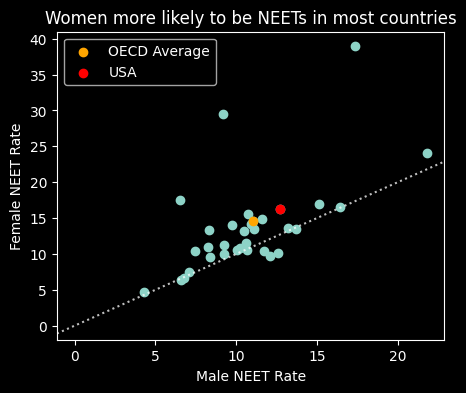

In [66]:
plt.figure(figsize=(5,4))
plt.scatter(x=oecd_gender['ratemen'], y=oecd_gender['ratewomen'])
plt.scatter(x=oecd_avg_gender['ratemen'], y=oecd_avg_gender['ratewomen'], color = 'orange', label = 'OECD Average')
plt.scatter(x=oecd_US_gender['ratemen'], y=oecd_US_gender['ratewomen'], color = 'red', label = 'USA')
plt.axline(xy1=(0,0), slope=1, linestyle=':', alpha = .75)
plt.xlabel('Male NEET Rate')
plt.ylabel('Female NEET Rate')
plt.title('Women more likely to be NEETs in most countries')
plt.legend();

Most countries seem to have higher female NEET rates, including the US. Of course, this pattern may vary depending on how we define NEETs, and this is what we'll be exploring throughout this project. Of the [research](https://www.stlouisfed.org/on-the-economy/2024/aug/not-working-out-of-school-young-adults-us-race-geography) explicitly [focusing](https://cepr.net/publications/are-young-men-falling-behind-young-women-the-neet-rate-helps-shed-light-on-the-matter/) on [U.S. NEETs](https://measureofamerica.org/youth-disconnection-2024/) (note that NEETs may also be referred to as 'disconnected youth', though these are generally interchangeable), they generally find a slightly higher rate among young women than men; as for time trends, there's generally been a decrease in the NEET rate, with some noise along the way. 

## The Data

To study NEETs in the US, we'll be using data from two sources, both from the US Census Bureau:

1. [Current Population Survey](https://www.census.gov/programs-surveys/cps/about.html): The CPS is a monthly survey that includes questions on a host of topics related to the labor force. This is where the BLS derives their estimates for weekly earnings, unemployment, labor force participation, and many more.

2. [American Community Survey](https://www.census.gov/programs-surveys/acs/about.html): The ACS is a annual survey collecting data on a less focused subject range, but the questions needed to study NEETs are included in this survey as well.

We'll be using both the CPS and ACS through the [Integrated Public Use Microdata Series](https://www.ipums.org/), or IPUMS for short. IPUMS, hosted by the University of Minnesota allows for easy analysis of these surveys, especially with changes in time. 

We'll be accessing the IPUMS API through `ipumspy`, a python library used for working with with IPUMS API and the data. To access the API, you'll need an IPUMS API key, which you can be [guided through here](https://ipumspy.readthedocs.io/en/latest/getting_started.html).